In [ ]:
!pip install "ucimlrepo"

<ipython-input-15-c7169490b42e>:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  parity_results = data.groupby('International').apply(calculate_parity)


   International       PPV       NPV
0              0  0.499536  0.321975
1              1  0.490909  0.290909


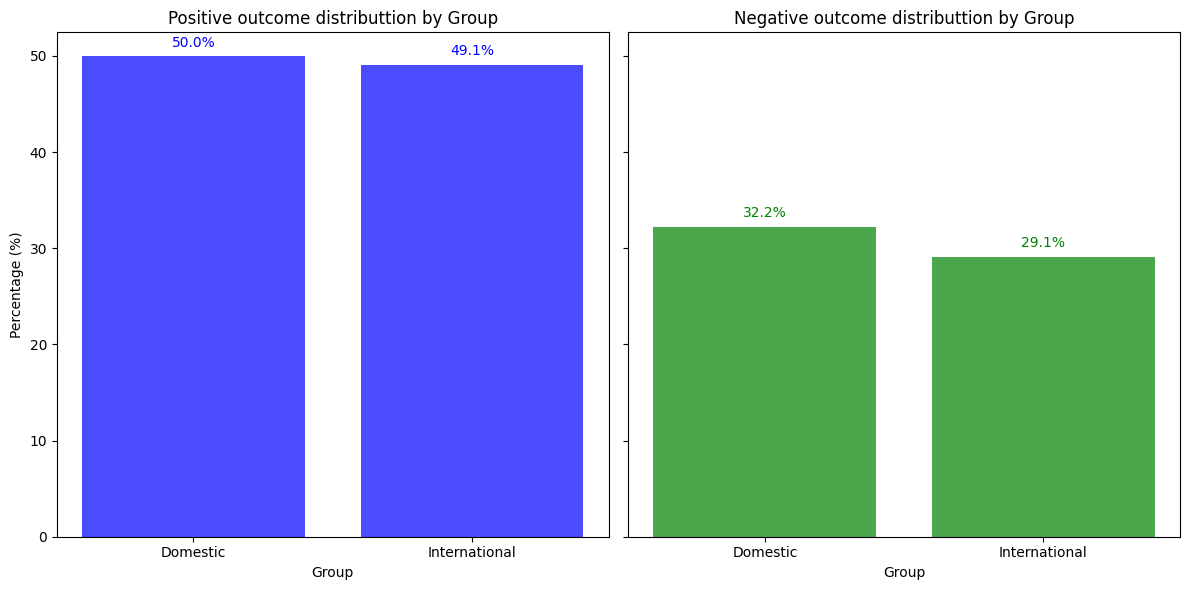

In [15]:

from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
# fetch dataset - https://archive.ics.uci.edu/dataset/697
repo = fetch_ucirepo(id=697)

# Access the features and targets
X = repo.data.features  # Feature data
y = repo.data.targets['Target']  # Target data

# Combine features and target into a single DataFrame for analysis
data = X.copy()
data['Target'] = y

# Define the positive and negative outcomes
positive_outcome = "Graduate"
negative_outcome = "Dropout"

# Function to calculate PPV and NPV
def calculate_parity(group):
    # PPV: Positive Predictive Value
    ppv = group[group['Target'] == positive_outcome].shape[0] / group.shape[0]

    # NPV: Negative Predictive Value
    # predicted_negatives = group[group['Target'] != positive_outcome]
    # npv = (
    #     predicted_negatives[predicted_negatives['Target'] == negative_outcome].shape[0]
    #     / predicted_negatives.shape[0]
    #     if predicted_negatives.shape[0] > 0 else 0
    # )

    npv = group[group['Target'] == negative_outcome].shape[0] / group.shape[0]

    return pd.Series({'PPV': ppv, 'NPV': npv})

# Group by "International" and calculate PPV and NPV
parity_results = data.groupby('International').apply(calculate_parity)

# Reset the index for better readability
parity_results.reset_index(inplace=True)

# Display the results
print(parity_results)



# The code below this line ChatGPT generated:

# Define group names
group_names = ['Domestic', 'International']

# Convert PPV and NPV to percentages
parity_results['PPV'] = parity_results['PPV'] * 100
parity_results['NPV'] = parity_results['NPV'] * 100

# Create a side-by-side plot for PPV and NPV comparison across groups
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# PPV Plot
ax[0].bar(group_names, parity_results['PPV'], color='blue', alpha=0.7)
ax[0].set_title('Positive outcome distributtion by Group')
ax[0].set_ylabel('Percentage (%)')
ax[0].set_xlabel('Group')
for i, ppv in enumerate(parity_results['PPV']):
    ax[0].text(i, ppv + 1, f'{ppv:.1f}%', ha='center', color='blue')

# NPV Plot
ax[1].bar(group_names, parity_results['NPV'], color='green', alpha=0.7)
ax[1].set_title('Negative outcome distributtion by Group')
ax[1].set_xlabel('Group')
for i, npv in enumerate(parity_results['NPV']):
    ax[1].text(i, npv + 1, f'{npv:.1f}%', ha='center', color='green')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()